In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [2]:
print("|+| IMAGE CLASSIFICATION MODEL CREATION")

print()

print("|+| STEP#1 IMAGE PRE-PROCESSING")

|+| IMAGE CLASSIFICATION MODEL CREATION

|+| STEP#1 IMAGE PRE-PROCESSING


In [3]:
train_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

In [4]:
training_images = train_image_generator.flow_from_directory(
                                        'covid19dataset/train',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')

testing_images = test_image_generator.flow_from_directory(
                                        'covid19dataset/test',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [5]:
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(training_images)

In [6]:
img_gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15)

In [7]:
print("|+| CREATE CNN MODEL")
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

|+| CREATE CNN MODEL


In [8]:
print("|+| TRAIN THE MODEL")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(training_images, epochs=5, validation_data=testing_images)

|+| TRAIN THE MODEL
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
17/17 [==============================] - 3s 176ms/step - loss: 0.6731 - accuracy: 0.5385 - val_loss: 0.4631 - val_accuracy: 0.8333
Epoch 2/5
17/17 [==============================] - 3s 177ms/step - loss: 0.2747 - accuracy: 0.9231 - val_loss: 0.1597 - val_accuracy: 0.9444
Epoch 3/5
17/17 [==============================] - 3s 170ms/step - loss: 0.1224 - accuracy: 0.9538 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 4/5
17/17 [==============================] - 3s 170ms/step - loss: 0.1181 - accuracy: 0.9769 - val_loss: 0.0871 - val_accuracy: 1.0000
Epoch 5/5
17/17 [==============================] - 3s 177ms/step - loss: 0.1011 - accuracy: 0.9692 - val_loss: 0.1320 - val_accuracy: 0.9444


In [9]:
print("|+| Evaluating Network...")
predicting = model.predict(training_images, batch_size=8) 

|+| Evaluating Network...


In [10]:
import numpy as np
predicting = np.argmax(predicting, axis=1)

In [12]:
model = model.save("covid_chest.h5")

In [13]:
model = load_model("covid_chest.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Testing the Normal Image
#image = cv2.imread("covid19dataset/test/normal/NORMAL2-IM-1385-0001.jpeg")    # 1
image = cv2.imread("covid19dataset/test/covid/nejmoa2001191_f3-PA.jpeg")    # 0
image = cv2.resize(image, (64, 64))
image = np.reshape(image, [1, 64, 64, 3])

In [18]:
classes = model.predict_classes(image)
label = ["COVID-19 INFECTED", "NORMAL"]
print(classes)
print(label[classes[0][0]])

[[0]]
COVID-19 INFECTED


In [19]:
print("|+| VISUALIZING ACCURACY AND LOSS")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

|+| VISUALIZING ACCURACY AND LOSS


In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs_range = range(5)

Text(0.5, 1.0, 'ACCURACY')

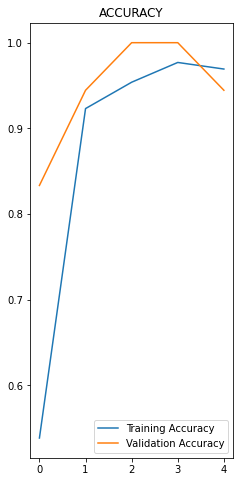

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

Text(0.5, 1.0, 'LOSS')

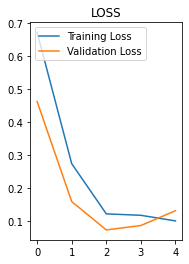

In [23]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

In [24]:
plt.show()